TRABALHO MÓDULO 4 PARTE I - Curso Desenvolvedor Python - IGTI

In [63]:
#importa as bibliotecas necessárias
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import neighbors
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from mlxtend.plotting import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier # importa o classificador árvore de decisão
from sklearn import metrics #importa as métricas para avaliação
from sklearn.metrics import plot_confusion_matrix
# --> nas versões atuais do sklearn o mlxtend.plotting foi substituído melo sklearn.metrics
# from mlxtend.plotting import plot_confusion_matrix

#import das bibliotecas necessárias para realizar a visualização da árvore de decisão
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

#bibliotecas para redes neurais
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from tensorflow.keras.layers import Input, Dense, Dropout, Activation  #importando as camadas a serem utilizadas
from tensorflow.keras.models import Model  #importando o modelo a ser empregado
import seaborn as sns #plotar gráficos

In [12]:
#upload da base de dados
diabetes = pd.read_csv('C:/Users/Dell/Bootcamp_Python_IGTI/datasets_diabetes.csv', sep=',', low_memory=False)

In [13]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [16]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [14]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [19]:
diabetes["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

PREPARANDO OS DADOS PARA OS MODELOS DE CLASSIFICAÇÃO

In [20]:
entradas = diabetes.iloc[:, :-1].values
saida = diabetes.iloc[:, -1].values

In [25]:
# Normalização dos dados de entrada para um ajuste mais eficiente dos modelos
normaliza = MinMaxScaler() #objeto para a normalização
entradas_normalizadas = normaliza.fit_transform(entradas)

In [26]:
# Divisão dos dados de entrada entre treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(entradas_normalizadas, saida, test_size=0.30,random_state=42)

In [124]:
len(X_train)

537

Aplicando os algoritmos de classificação

In [91]:
# utiliza a construção por meio de 5 vizinhos (n_neighbors)
clf_KNN = KNeighborsClassifier(n_neighbors=5)
clf_KNN.fit(X_train, y_train) # aplica a classificação (fit)

KNeighborsClassifier()

In [94]:
#realiza a previsão
y_pred_KNN = clf_KNN.predict(X_test)

In [95]:
#constroi a matriz de confusão para comparar o modelo criado
print(confusion_matrix(y_test, y_pred_KNN))
print(classification_report(y_test, y_pred_KNN))

[[118  33]
 [ 41  39]]
              precision    recall  f1-score   support

           0       0.74      0.78      0.76       151
           1       0.54      0.49      0.51        80

    accuracy                           0.68       231
   macro avg       0.64      0.63      0.64       231
weighted avg       0.67      0.68      0.68       231



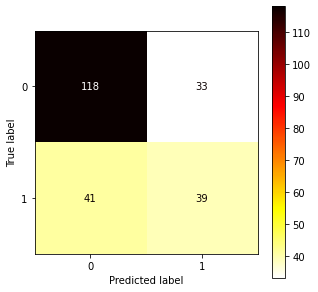

In [97]:
#realiza o plot da matriz de confusão
plt.rcParams["figure.figsize"]=(5, 5)
plot_confusion_matrix(clf_KNN, X_test, y_test, cmap = 'hot_r')
plt.show()

In [98]:
clf_arvore = DecisionTreeClassifier(random_state=1)
clf_arvore.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [99]:
#realiza a previsão
y_pred_arvore = clf_arvore.predict(X_test)

In [100]:
print(confusion_matrix(y_test, y_pred_arvore))
print(classification_report(y_test, y_pred_arvore))

[[106  45]
 [ 25  55]]
              precision    recall  f1-score   support

           0       0.81      0.70      0.75       151
           1       0.55      0.69      0.61        80

    accuracy                           0.70       231
   macro avg       0.68      0.69      0.68       231
weighted avg       0.72      0.70      0.70       231



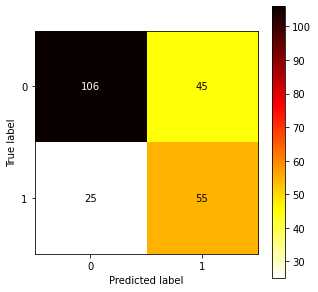

In [102]:
#realiza o plot da matriz de confusão
plt.rcParams["figure.figsize"]=(5, 5)
plot_confusion_matrix(clf_arvore, X_test, y_test, cmap = 'hot_r')
plt.show()

In [103]:
clf_floresta = RandomForestClassifier(max_depth=10, random_state=1)
clf_floresta.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=1)

In [104]:
#realiza a previsão
y_pred_floresta = clf_floresta.predict(X_test)

In [105]:
print(confusion_matrix(y_test, y_pred_floresta))
print(classification_report(y_test, y_pred_floresta))

[[121  30]
 [ 29  51]]
              precision    recall  f1-score   support

           0       0.81      0.80      0.80       151
           1       0.63      0.64      0.63        80

    accuracy                           0.74       231
   macro avg       0.72      0.72      0.72       231
weighted avg       0.75      0.74      0.74       231



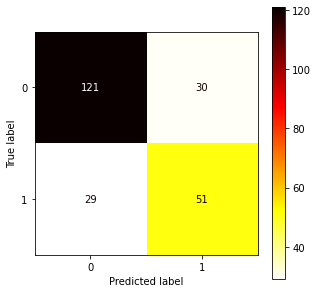

In [107]:
#realiza o plot da matriz de confusão
plt.rcParams["figure.figsize"]=(5, 5)
plot_confusion_matrix(clf_floresta, X_test, y_test, cmap = 'hot_r')
plt.show()

In [108]:
clf_svm=SVC(gamma='auto',random_state=1)
clf_svm.fit(X_train,y_train)

SVC(gamma='auto', random_state=1)

In [109]:
#realiza a previsão
y_pred_svm = clf_svm.predict(X_test)

In [110]:
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

[[136  15]
 [ 38  42]]
              precision    recall  f1-score   support

           0       0.78      0.90      0.84       151
           1       0.74      0.53      0.61        80

    accuracy                           0.77       231
   macro avg       0.76      0.71      0.73       231
weighted avg       0.77      0.77      0.76       231



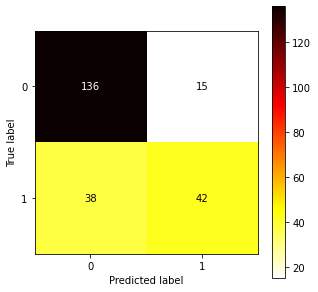

In [112]:
#realiza o plot da matriz de confusão
plt.rcParams["figure.figsize"]=(5, 5)
plot_confusion_matrix(clf_svm, X_test, y_test, cmap = 'hot_r')
plt.show()

In [113]:
clf_mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 5), random_state=1)
clf_mlp.fit(X_train,y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 5), random_state=1,
              solver='lbfgs')

In [114]:
#realiza a previsão
y_pred_mlp = clf_mlp.predict(X_test)

In [115]:
print(confusion_matrix(y_test, y_pred_mlp))
print(classification_report(y_test, y_pred_mlp))

[[117  34]
 [ 28  52]]
              precision    recall  f1-score   support

           0       0.81      0.77      0.79       151
           1       0.60      0.65      0.63        80

    accuracy                           0.73       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.73      0.73       231



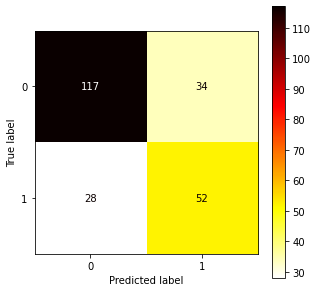

In [117]:
#realiza o plot da matriz de confusão
plt.rcParams["figure.figsize"]=(5, 5)
plot_confusion_matrix(clf_mlp, X_test, y_test, cmap = 'hot_r')
plt.show()

Comparação das acurácias dos modelos

In [118]:
print("Acurácia para a classificação utilizando o KNN:  ", accuracy_score(y_pred_KNN,y_test))
print("Acurácia para a classificação utilizando o ÁRVORE DE DECISÃO:  ", accuracy_score(y_pred_arvore,y_test))
print("Acurácia para a classificação utilizando o RANDOM FOREST:  ", accuracy_score(y_pred_floresta,y_test))
print("Acurácia para a classificação utilizando o SVM:  ", accuracy_score(y_pred_svm,y_test))
print("Acurácia para a classificação utilizando o REDE MLP:  ", accuracy_score(y_pred_mlp,y_test))

Acurácia para a classificação utilizando o KNN:   0.6796536796536796
Acurácia para a classificação utilizando o ÁRVORE DE DECISÃO:   0.696969696969697
Acurácia para a classificação utilizando o RANDOM FOREST:   0.7445887445887446
Acurácia para a classificação utilizando o SVM:   0.7705627705627706
Acurácia para a classificação utilizando o REDE MLP:   0.7316017316017316


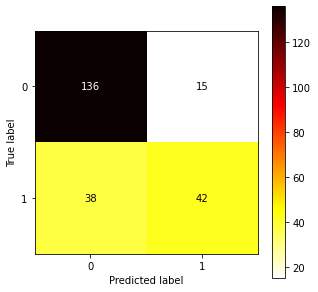

In [119]:
plt.rcParams["figure.figsize"]=(5, 5)
plot_confusion_matrix(clf_svm, X_test, y_test, cmap = 'hot_r')
plt.show()